In [0]:
import numpy as np
import pandas as pd
#data_global_raw_url = 'https://raw.githubusercontent.com/cemansilla/covid-19-notebook/master/server/data/global.json'
#df1 = pd.read_json(data_global_raw_url)
#print(df1.head())

Importación de datos

In [0]:
#TODO: automatizar la captura de datos
cases_by_days = [1,0,1,6,1,3,0,7,0,12,3,11,11,9,14,18,31,30,67,41,35,86,115,87,101,55,75,146,76,167,132,186,103]
deaths_by_days = [0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,2,2,4,5,2,1,4,6,7,3,6,3]

#Cálculo de acumulativo a través de los días
cases = np.cumsum(cases_by_days)
deaths = np.cumsum(deaths_by_days)

Cálculo del factor de incremento en base a casos confirmados

In [0]:
#Descarto n cantidad de días del principio
offset_days = 1
cases = cases[offset_days:]

values = []
for i, val in enumerate(cases):
  if(i > 0 and cases[i-1] > 0):
    f = cases[i] / cases[i-1] #Factor
    values.append(f)

#Media del factor
growth_factor = np.mean(values)

Cálculo de predicción

In [0]:
days_to_predict = 5
forecast_days = len(cases) + days_to_predict

forecast = []
i = 1
while i <= forecast_days:
  try:
    last_forecast = cases[i-1]
  except:
    last_forecast = forecast[-1]

  f = growth_factor * last_forecast
  forecast.append(f)

  i+=1

Vinculación de datos con días (cuando trabaje con el dataset esto saldrá de ahí)

Grafico

[Text(0.5, 1.0, 'Casos confirmados')]

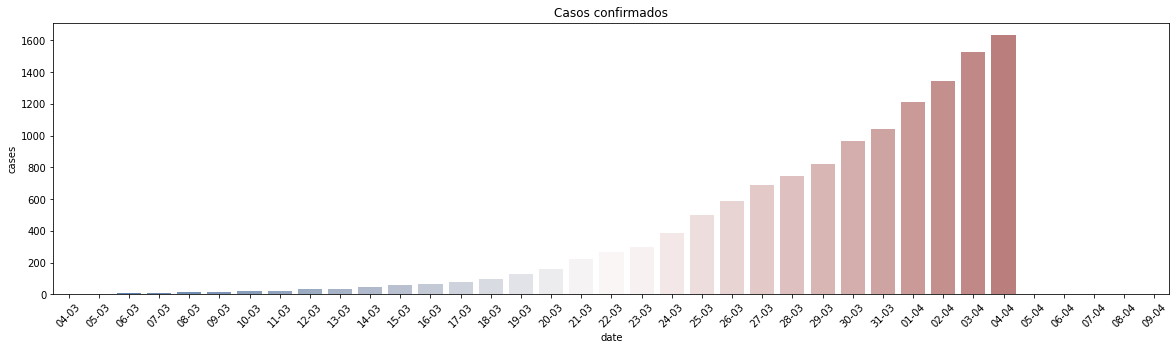

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

#Obtengo los días en el rango especificado
start_date = pd.to_datetime('2020-03-04')
a_dates = pd.date_range(start_date, periods=forecast_days, freq='D')
df_dates = pd.DataFrame(a_dates.format(formatter=lambda x: x.strftime('%d-%m')))

df_cases = pd.DataFrame(cases)
df_cases = pd.concat([df_dates, df_cases], axis=1)
df_cases.columns = ['date', 'cases']

plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.barplot(data=df_cases, x='date', y='cases', palette="vlag").set(title = 'Casos confirmados')
#plt.show()


Muertes

[Text(0.5, 1.0, 'Muertes confirmadas')]

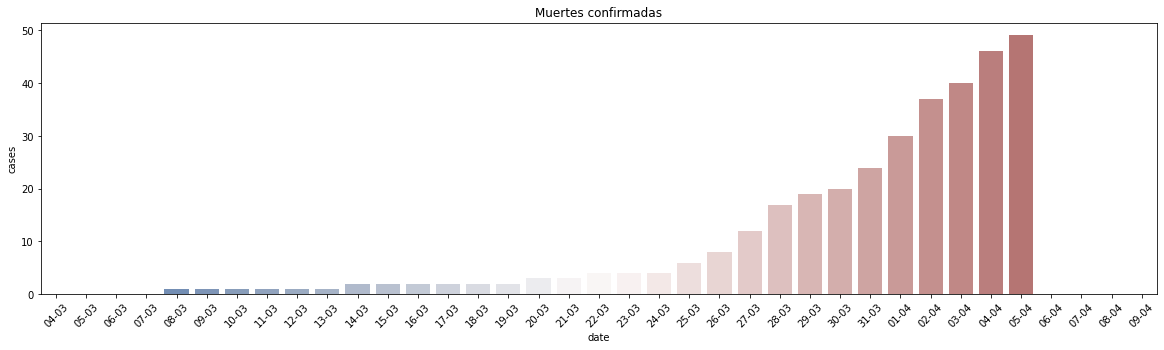

In [207]:
df_deaths = pd.DataFrame(deaths)
df_deaths = pd.concat([df_dates, df_deaths], axis=1)
df_deaths.columns = ['date', 'cases']

plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.barplot(data=df_deaths, x='date', y='cases', palette="vlag").set(title = 'Muertes confirmadas')
#plt.show()

Predicción

[Text(0.5, 1.0, 'Predicción')]

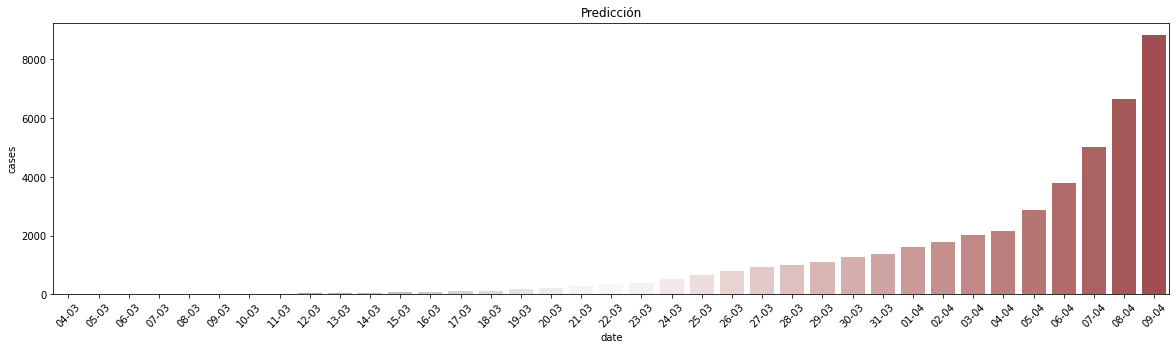

In [208]:
df_forecast = pd.DataFrame(forecast)
df_forecast = pd.concat([df_dates, df_forecast], axis=1)
df_forecast.columns = ['date', 'cases']

plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.barplot(data=df_forecast, x='date', y='cases', palette="vlag").set(title = 'Predicción')
#plt.show()

Graficos superpuestos (Matplotlib)

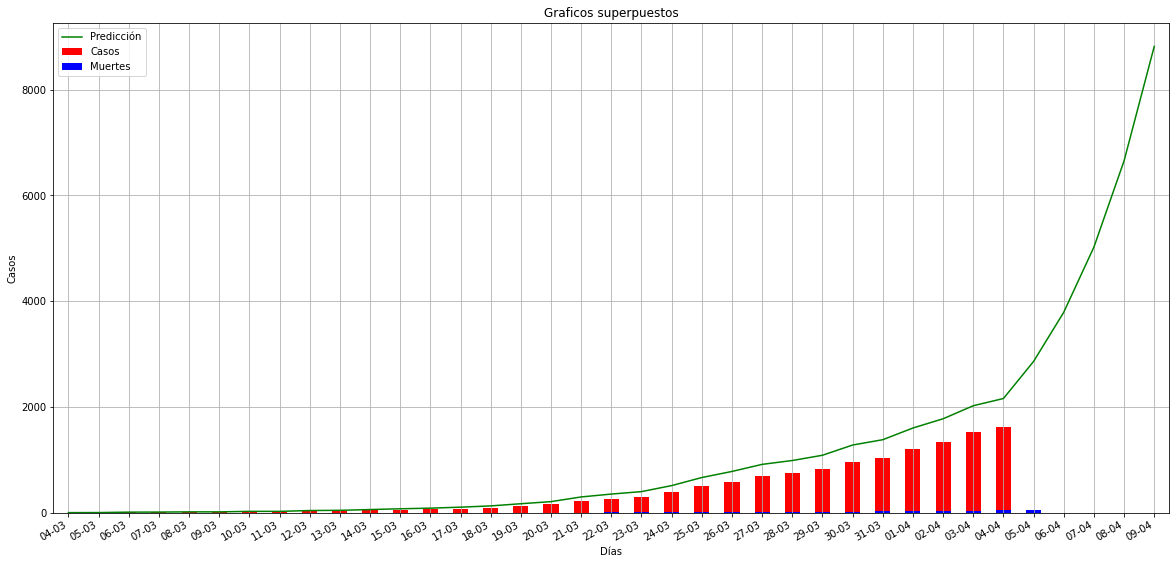

In [209]:
ax = df_cases.plot(kind='bar', color='red' ,figsize=(20,10))
df_deaths.plot(kind='bar', color='blue', ax=ax)
df_forecast.plot(kind='line', color='green', ax=ax)

#Etiquetas
plt.ylabel('Casos')
plt.xlabel('Días')
ax.set_title('Graficos superpuestos')
plt.legend(['Predicción', 'Casos', 'Muertes'])

#Fechas en etiquetas del eje x
plt.xticks(np.arange(forecast_days), a_dates.format(formatter=lambda x: x.strftime('%d-%m')))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

Graficos superpuestos (Bokeh)

In [243]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook

# Inicializo Bokeh
output_notebook()

df_dates = pd.DataFrame(a_dates)

p = figure(x_axis_type="datetime", title="Días", plot_width=800, plot_height=400)

#Casos
df_cases = pd.concat([df_dates, pd.DataFrame(cases)], axis=1)
df_cases.columns = ['date', 'cases']
p.step('date', 'cases', source=ColumnDataSource(df_cases), name="Casos confirmados", legend_label='Casos confirmados', line_color='orange', line_width=2)

#Muertes
df_deaths = pd.concat([df_dates, pd.DataFrame(deaths)], axis=1)
df_deaths.columns = ['date', 'deaths']
p.step('date', 'deaths', source=ColumnDataSource(df_deaths), name="Muertes confirmadas", legend_label='Muertes confirmadas', line_color='black', line_width=2)

#Predicción
df_forecast = pd.concat([df_dates, pd.DataFrame(forecast)], axis=1)
df_forecast.columns = ['date', 'cases']
p.line('date', 'cases', source=ColumnDataSource(df_forecast), name="Predicción", legend_label='Predicción de casos', line_color='red', line_width=2)
hover = HoverTool(
    tooltips=[("","$name"), ("Casos","@cases{int}"), ("Día", "@date{%d-%m-%Y}")], 
    formatters= { '@date': 'datetime' }
)
p.add_tools(hover)

p.legend.location = "top_left"
show(p)